# Analyse d'incertitude par Monte Carlo en régime établi

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import CoolProp.CoolProp as CP

## Data settings

In [2]:
np.random.seed(42)  # Pour la reproductibilité
data = {
    'T1': np.random.normal(273.15, 0.5, 30),  # 30 points pour l'exemple
    'P1': np.random.normal(1e5, 500, 30),
    'm_dot': np.random.normal(0.1, 0.01, 30)
}
df = pd.DataFrame(data)

### Measurements plot

In [3]:
print("Aperçu des données :")
print(df.head())

Aperçu des données :
           T1             P1     m_dot
0  273.398357   99699.146694  0.095208
1  273.080868  100926.139092  0.098143
2  273.473844   99993.251388  0.088937
3  273.911515   99471.144536  0.088038
4  273.032923  100411.272456  0.108125


## Statistical calculus

In [5]:
means = df.mean()
n = len(df)
mean_errors = df.std() / np.sqrt(n)
extended_errors = 2 * mean_errors

In [6]:
print("\nMoyennes :\n", moyennes)
print("\nIncertitudes-types sur les moyennes :\n", incertitudes_moyennes)
print("\nIncertitudes élargies (k=2) :\n", incertitudes_elargies)


Moyennes :
 T1         273.055927
P1       99939.418765
m_dot        0.100129
dtype: float64

Incertitudes-types sur les moyennes :
 T1        0.082159
P1       84.997613
m_dot     0.001811
dtype: float64

Incertitudes élargies (k=2) :
 T1         0.164318
P1       169.995226
m_dot      0.003622
dtype: float64


## Stationarity check

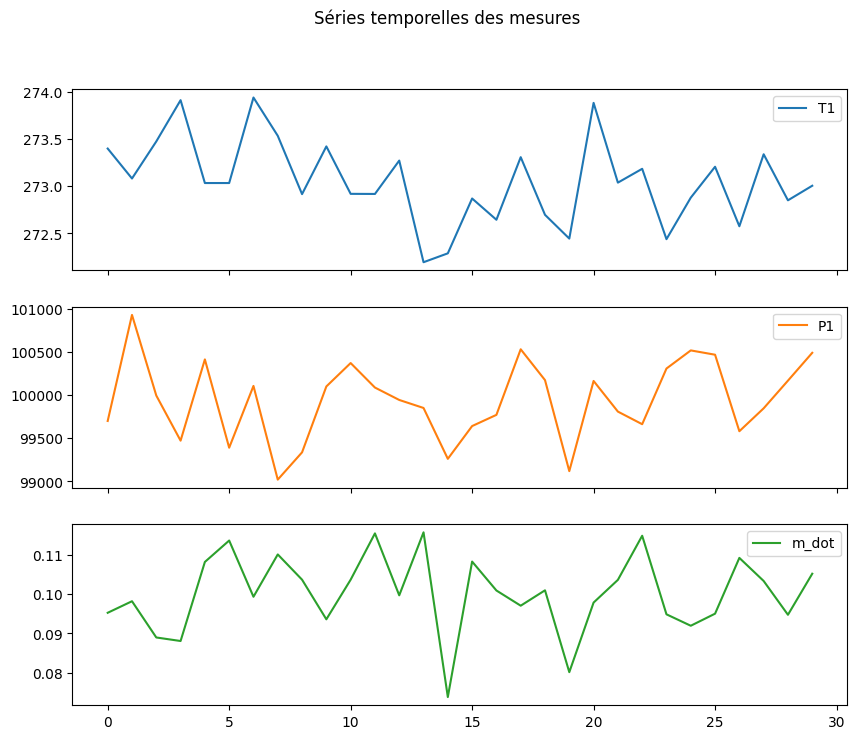

In [7]:
df.plot(subplots=True, layout=(3,1), figsize=(10, 8))
plt.suptitle("Séries temporelles des mesures")
plt.show()


## Monte Carlo simulation over the averaged measurements

In [8]:
n_simulations = 10**6

### Random sample generation 

In [9]:
T1_samples = np.random.normal(moyennes['T1'], incertitudes_moyennes['T1'], n_simulations)
P1_samples = np.random.normal(moyennes['P1'], incertitudes_moyennes['P1'], n_simulations)
m_dot_samples = np.random.normal(moyennes['m_dot'], incertitudes_moyennes['m_dot'], n_simulations)

### Enthalpy calculus (R245fa)

In [11]:
h_samples = np.array([CP.PropsSI('H', 'T', T, 'P', P, 'R134a') for T, P in zip(T1_samples, P1_samples)])

### Results analysis

In [12]:
h_mean = np.mean(h_samples)
h_std = np.std(h_samples)
incertitude_elargie_h = 2 * h_std

print(f"\nEnthalpie moyenne : {h_mean:.2f} J/kg")
print(f"Incertitude élargie (k=2) : {incertitude_elargie_h:.2f} J/kg")


Enthalpie moyenne : 403655.10 J/kg
Incertitude élargie (k=2) : 134.05 J/kg


## Enthalpy distribution visualization 

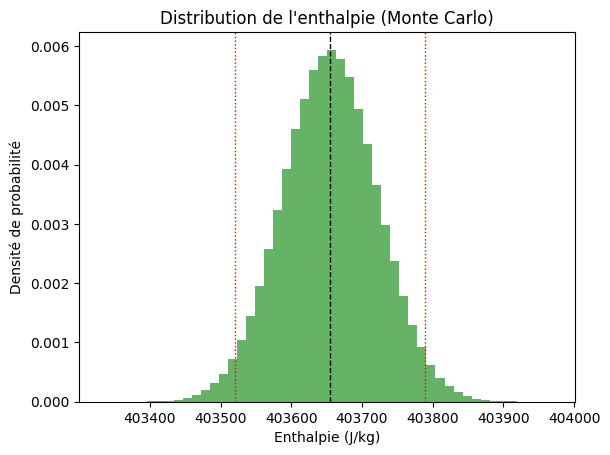

In [13]:
plt.hist(h_samples, bins=50, density=True, alpha=0.6, color='g')
plt.axvline(h_mean, color='k', linestyle='dashed', linewidth=1)
plt.axvline(h_mean + incertitude_elargie_h, color='r', linestyle='dotted', linewidth=1)
plt.axvline(h_mean - incertitude_elargie_h, color='r', linestyle='dotted', linewidth=1)
plt.title("Distribution de l'enthalpie (Monte Carlo)")
plt.xlabel("Enthalpie (J/kg)")
plt.ylabel("Densité de probabilité")
plt.show()

## Systematical errors consideration

###

### Uniform and systematical error of 0.5K over T1 

In [14]:
T1_sys = np.random.uniform(-0.5, 0.5, n_simulations)
T1_samples_sys = T1_samples + T1_sys

### Recalcul de l'enthalpie avec incertitude systématique

In [15]:
h_samples_sys = np.array([CP.PropsSI('H', 'T', T, 'P', P, 'R134a') for T, P in zip(T1_samples_sys, P1_samples)])

h_mean_sys = np.mean(h_samples_sys)
h_std_sys = np.std(h_samples_sys)
incertitude_elargie_h_sys = 2 * h_std_sys

print(f"\nEnthalpie moyenne (avec incertitude systématique) : {h_mean_sys:.2f} J/kg")
print(f"Incertitude élargie (k=2) : {incertitude_elargie_h_sys:.2f} J/kg")


Enthalpie moyenne (avec incertitude systématique) : 403655.03 J/kg
Incertitude élargie (k=2) : 489.31 J/kg


## Prise en compte des corrélations (exemple)

### Matrice de covariance pour T1 et P1

In [ ]:
cov_matrix = np.array([[incertitudes_moyennes['T1']**2, 0.5*incertitudes_moyennes['T1']*incertitudes_moyennes['P1']],
                       [0.5*incertitudes_moyennes['T1']*incertitudes_moyennes['P1'], incertitudes_moyennes['P1']**2]])
T1_P1_samples = np.random.multivariate_normal([moyennes['T1'], moyennes['P1']], cov_matrix, n_simulations)
T1_samples_corr, P1_samples_corr = T1_P1_samples[:, 0], T1_P1_samples[:, 1]

### Calcul de l'enthalpie avec corrélations

In [ ]:
h_samples_corr = np.array([CP.PropsSI('H', 'T', T, 'P', P, 'R134a') for T, P in zip(T1_samples_corr, P1_samples_corr)])

h_mean_corr = np.mean(h_samples_corr)
h_std_corr = np.std(h_samples_corr)
incertitude_elargie_h_corr = 2 * h_std_corr

print(f"\nEnthalpie moyenne (avec corrélations) : {h_mean_corr:.2f} J/kg")
print(f"Incertitude élargie (k=2) : {incertitude_elargie_h_corr:.2f} J/kg")

# Dumb test

In [26]:
import numpy as np

# Données d'étalonnage
import numpy as np

# Exemple de données d'étalonnage (en K)
T_ref = np.array([273.15, 300.00, 323.15, 350.00])  # Températures de référence
T_mes = np.array([273.00, 300.50, 323.00, 350.25])  # Températures mesurées par le thermocouple

# Régression linéaire
a, b = np.polyfit(T_mes, T_ref, 1)

# Matrice de covariance des coefficients
cov_matrix = np.cov(T_mes, T_ref, ddof=2)  # À adapter pour obtenir la covariance de a et b
# Avec numpy.polyfit, on peut obtenir directement la matrice de covariance :
cov_matrix = np.polyfit(T_mes, T_ref, 1, cov=True)[1]

u_a = np.sqrt(cov_matrix[0, 0])  # Incertitude-type sur a
u_b = np.sqrt(cov_matrix[1, 1])  # Incertitude-type sur b
cov_ab = cov_matrix[0, 1]        # Covariance entre a et b

print(f"a = {a:.4f} ± {u_a:.4f}")
print(f"b = {b:.4f} ± {u_b:.4f}")
print(f"Cov(a, b) = {cov_ab:.4f}")

# Exemple de série de mesures en régime établi (en K)
T_mes_series = np.random.normal(323.15, 0.5, 30)  # Moyenne = 323.15 K, écart-type = 0.5 K

a_b_samples = np.random.multivariate_normal(
    mean=[a, b],
    cov=cov_matrix,
    size=n_simulations
)
T_corrigee_samples = a_b_samples[:, 0] * T_mesuree + a_b_samples[:, 1]
u_T_corrigee_mc = np.std(T_corrigee_samples)

print(f"Incertitude (Monte Carlo) : {u_T_corrigee_mc:.4f} K")

# Incertitude-type sur T_mesurée (exemple)
u_resolution = 0.1 / np.sqrt(3)
u_repetabilite = np.std(T_mes_series, ddof=1)  # Écart-type des 30 mesures
u_precision = 1.5 / np.sqrt(3)  # Incertitude systématique du thermocouple

u_T_mes = np.sqrt(u_resolution**2 + u_repetabilite**2 + u_precision**2)
print(f"u(T_mesurée) = {u_T_mes:.4f} K")

# Calcul pour chaque mesure
u_T_corrigee_series = np.sqrt(
    (a * u_T_mes)**2 +
    (T_mes_series * u_a)**2 +
    u_b**2 +
    2 * T_mes_series * cov_ab
)

# Calcul des T_corrigee_i
T_corrigee_series = a * T_mes_series + b

# Incertitude moyenne
u_T_corrigee_moyenne = np.sqrt(np.sum(u_T_corrigee_series**2)) / len(T_mes_series)

print(f"T_corrigee moyenne = {np.mean(T_corrigee_series):.4f} K")
print(f"u(T_corrigee moyenne) = {u_T_corrigee_moyenne:.4f} K")

U_T_corrigee_moyenne = 2 * u_T_corrigee_moyenne
print(f"U(T_corrigee moyenne) = {U_T_corrigee_moyenne:.4f} K")

n_simulations = 10**6

# Tirage des coefficients a et b (corrélés)
a_b_samples = np.random.multivariate_normal(
    mean=[a, b],
    cov=cov_matrix,
    size=n_simulations
)

# Tirage des T_mesurée (distribution normale)
T_mes_samples = np.random.normal(
    loc=np.mean(T_mes_series),
    scale=u_T_mes,
    size=n_simulations
)

# Calcul des T_corrigee
T_corrigee_samples = a_b_samples[:, 0] * T_mes_samples + a_b_samples[:, 1]

# Incertitude-type et élargie
u_T_corrigee_mc = np.std(T_corrigee_samples)
U_T_corrigee_mc = 2 * u_T_corrigee_mc

print(f"u(T_corrigee moyenne, Monte Carlo) = {u_T_corrigee_mc:.4f} K")
print(f"U(T_corrigee moyenne, Monte Carlo) = {U_T_corrigee_mc:.4f} K")


a = 0.9975 ± 0.0067
b = 0.6726 ± 2.0815
Cov(a, b) = -0.0138
Incertitude (Monte Carlo) : 1.4214 K
u(T_mesurée) = 1.1141 K
T_corrigee moyenne = 323.0052 K
u(T_corrigee moyenne) = 0.2063 K
U(T_corrigee moyenne) = 0.4126 K
u(T_corrigee moyenne, Monte Carlo) = 1.1308 K
U(T_corrigee moyenne, Monte Carlo) = 2.2617 K


In [27]:
T_ref

array([273.15, 300.  , 323.15, 350.  ])